In [70]:
%pwd

'c:\\Users\\CARNOT\\StopSign\\RoadSignal\\yolov5'

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [ ]:
# %cd yolov5
%pip install -r requirements.txt

In [75]:
import itertools
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
from pathlib import Path
import shutil
import torch

c:\Users\CARNOT\StopSign\RoadSignal\stopsign\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
%cd ..

c:\Users\CARNOT\StopSign\RoadSignal


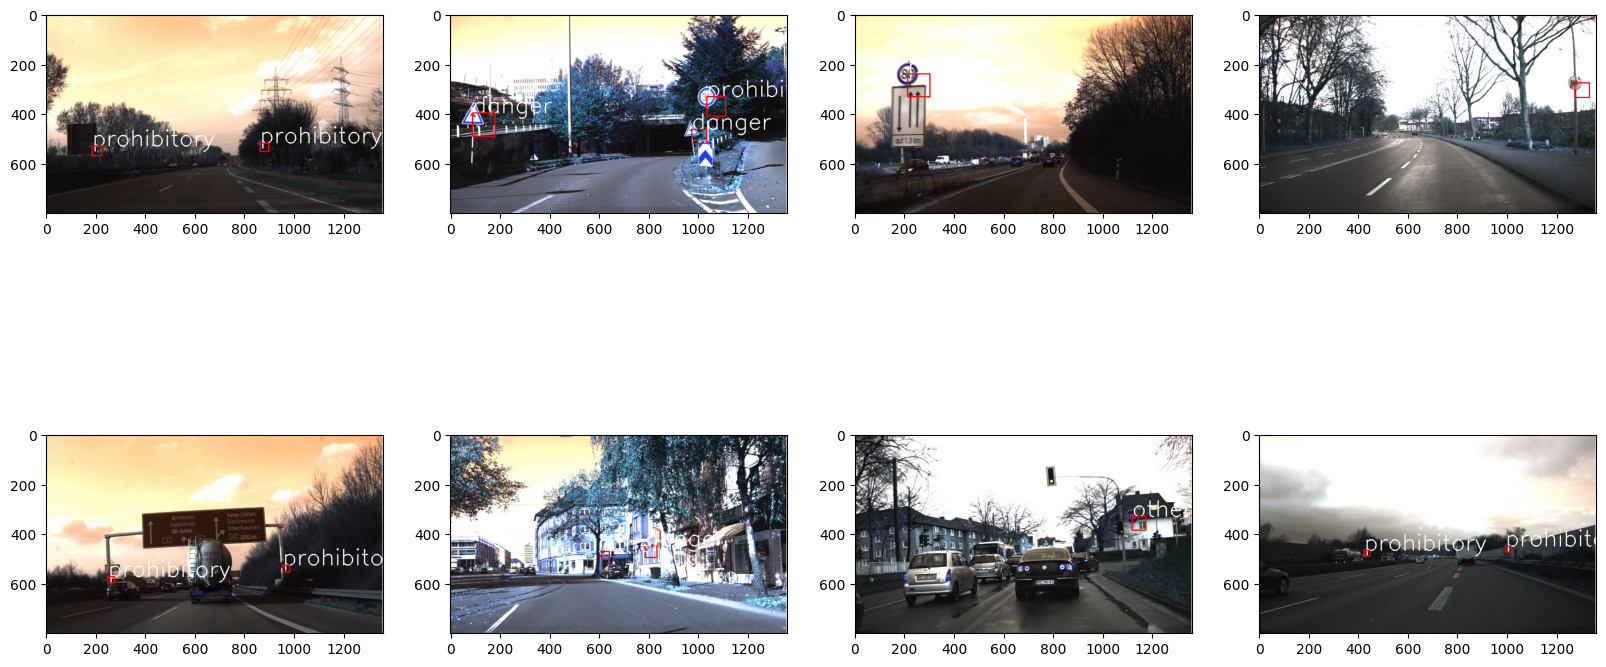

In [29]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
imgs = glob.glob(r"data\ts\ts\*.jpg")

for idx in itertools.product(range(2),range(4)): 
    imgname = np.random.choice(imgs)
    img = cv2.imread(imgname)
    dh, dw, _ = img.shape
    labelname = imgname.split(".")[0] + ".txt"
    with open(labelname, "r") as file:
        labelppt = file.read().split("\n")
        del(labelppt[-1])
        # print(labelppt)
    with open("data\classes.names", "r") as file:
        labels = file.read().split()
    for x in labelppt:
        label_id, x, y, w, h = x.split(" ")
        nx = int(float(x)*dw)
        ny = int(float(y)*dh)
        nw = int(float(w)*dw)
        nh = int(float(h)*dh)
        cv2.putText(img, labels[int(label_id)], (nx, ny), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 255, 255), 4)
        cv2.rectangle(img, (nx, ny), (nx+nw, ny+nh), (255, 0, 0), 4)
    ax[idx[0],idx[1]].imshow(img)

In [48]:
with open("data/train.txt") as file:
    lines = file.readlines()

train_imgs_path = ["data" + os.path.sep + "ts"+ os.path.sep+ "ts"+ os.path.sep+ os.path.basename(line.strip()) for line in lines]
train_labels_path = [label.replace("jpg", "txt") for label in train_imgs_path]

try:
    train_dir = os.mkdir("data/train")
except:
    print("file exist")

for x, y in zip(train_imgs_path, train_labels_path):
    shutil.move(x, "data/train/")
    shutil.move(y, "data/train/")

In [61]:
with open("data/test.txt") as file:
    lines = file.readlines()

val_imgs_path = ["data" + os.path.sep + "ts"+ os.path.sep+ "ts"+ os.path.sep+ os.path.basename(line.strip()) for line in lines]
val_labels_path = [label.replace("jpg", "txt") for label in val_imgs_path]

try:
    os.mkdir("data/val")
except:
    print("file exist")
else:
    for x, y in zip(val_imgs_path, val_labels_path):
        shutil.move(x, "data/val/")
        shutil.move(y, "data/val/")

In [77]:
size = 640
batch_size = 32
epochs = 5
model = "yolov5s"
workers = 1
project_name = "road_stop_sign"
run_name = f"{model}_epochs{epochs}_batch_size{batch_size}"

In [78]:
# %cd yolov5
!python train.py --img {size} --batch {batch_size} --epochs {epochs} --data stopsigns.yaml --weights {model}.pt --workers {workers} --project {project_name} --name {run_name} --exist-ok

train: weights=yolov5s.pt, cfg=, data=stopsigns.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=road_stop_sign, name=yolov5s_epochs5_batch_size32, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.2-240-gabbfd69 Python-3.9.12 torch-1.13.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 